
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '99101581'
first_name = 'Daniyal'
last_name = 'Rasti'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [7]:
# TODO: Write your code here
import pandas as pd
import numpy as np

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [8]:
spotify_data = pd.read_csv('spotify.csv')

# Select relevant features for clustering
# Retaining track_name and relevant numerical features for clustering
relevant_features = [
    'track_name', 'danceability', 'energy', 'key', 'loudness', 
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]

# Filter the dataframe to keep only the relevant features
spotify_data = spotify_data[relevant_features]

# Display the first few rows of the dataframe to verify
spotify_data.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [9]:

# Function to implement standard scaling
def standard_scaler(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    scaled_data = (data - mean) / std_dev
    return scaled_data

# Extracting the relevant numerical features for scaling
numerical_features = [
    'danceability', 'energy', 'key', 'loudness', 
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]

# Applying the standard scaler to the numerical features
scaled_features = standard_scaler(spotify_data[numerical_features])

# Converting the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Including the track_name in the scaled DataFrame
scaled_spotify_data = pd.concat([spotify_data['track_name'], scaled_features_df], axis=1)

# Display the first few rows of the scaled dataframe to verify
scaled_spotify_data.head()


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
1,Memories - Dillon Francis Remix,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
2,All the Time - Don Diablo Remix,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
3,Call You Mine - Keanu Silva Remix,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
4,Someone You Loved - Future Humans Remix,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

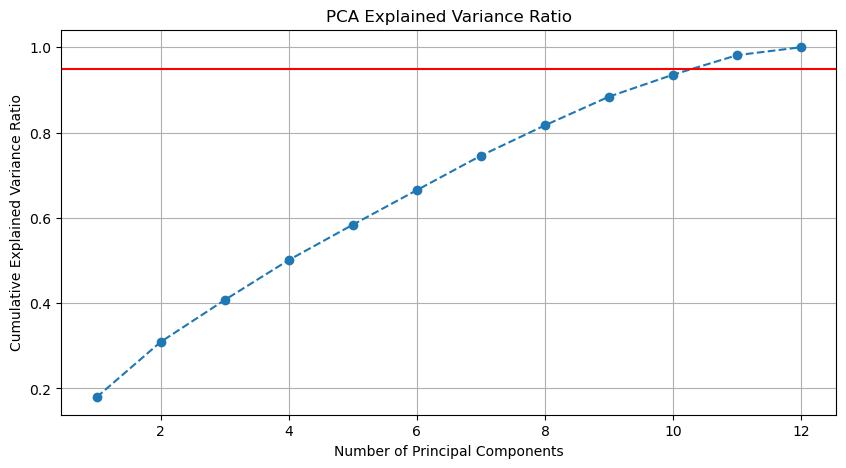

Number of components to retain: 11


,track_name,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,I Don't Care (with Justin Bieber) - Loud Luxur...,-1.540142,-0.527212,-0.794832,-0.467113,-0.821369,-0.721476,-0.400812,0.162239,0.753893,0.163250,-0.609126
1,Memories - Dillon Francis Remix,-1.090017,-0.879849,0.171874,-0.145500,0.558518,-0.139155,-1.458208,1.670500,0.978191,-0.544554,0.014759
2,All the Time - Don Diablo Remix,-1.638837,-0.643873,-0.350666,0.007159,-0.955531,-0.377351,-0.459231,-0.662937,-1.440905,0.354822,0.152814
3,Call You Mine - Keanu Silva Remix,-1.589418,0.021349,-0.307678,0.374661,-0.716976,-0.039261,-0.811501,0.020786,1.181187,-0.481637,-0.550137
4,Someone You Loved - Future Humans Remix,-1.073438,-0.338581,-1.829808,-0.354135,-0.551872,-0.583170,-0.157899,0.230153,-0.434586,0.139931,0.353810


In [10]:
# TODO: Write your code here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data and transform it
pca_data = pca.fit_transform(scaled_features_df)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components to retain (e.g., 95% of the variance)
cut_off = 0.95
num_components_to_retain = np.argmax(cumulative_explained_variance >= cut_off) + 1

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=cut_off, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

print(f'Number of components to retain: {num_components_to_retain}')

# Reduce the data to the number of retained components
pca = PCA(n_components=num_components_to_retain)
reduced_data = pca.fit_transform(scaled_features_df)

# Convert the reduced data to a DataFrame
reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components_to_retain)])

# Including the track_name in the reduced DataFrame
final_data = pd.concat([spotify_data['track_name'], reduced_data_df], axis=1)

# Display the first few rows of the reduced dataframe to verify
final_data.head()


# Clustering

Implement K-means for clustering from scratch.

In [12]:
# TODO: Write your code here

def initialize_centroids(data, k):
    """Randomly initialize the centroids by selecting k unique data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of all points in each cluster."""
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    """Check if the centroids have converged."""
    return np.linalg.norm(new_centroids - old_centroids) < tol

def kmeans(data, k, max_iters=300):
    """Perform K-means clustering."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Convert the reduced data to a numpy array for K-means clustering
data_for_clustering = reduced_data_df.to_numpy()

# Set the number of clusters
k = 5

# Perform K-means clustering
clusters, centroids = kmeans(data_for_clustering, k)

# Add the cluster assignments to the final data DataFrame
final_data['Cluster'] = clusters

# Display the first few rows of the final dataframe with cluster assignments
final_data.head()


,track_name,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Cluster
0,I Don't Care (with Justin Bieber) - Loud Luxur...,-1.540142,-0.527212,-0.794832,-0.467113,-0.821369,-0.721476,-0.400812,0.162239,0.753893,0.163250,-0.609126,0
1,Memories - Dillon Francis Remix,-1.090017,-0.879849,0.171874,-0.145500,0.558518,-0.139155,-1.458208,1.670500,0.978191,-0.544554,0.014759,2
2,All the Time - Don Diablo Remix,-1.638837,-0.643873,-0.350666,0.007159,-0.955531,-0.377351,-0.459231,-0.662937,-1.440905,0.354822,0.152814,0
3,Call You Mine - Keanu Silva Remix,-1.589418,0.021349,-0.307678,0.374661,-0.716976,-0.039261,-0.811501,0.020786,1.181187,-0.481637,-0.550137,0
4,Someone You Loved - Future Humans Remix,-1.073438,-0.338581,-1.829808,-0.354135,-0.551872,-0.583170,-0.157899,0.230153,-0.434586,0.139931,0.353810,0


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

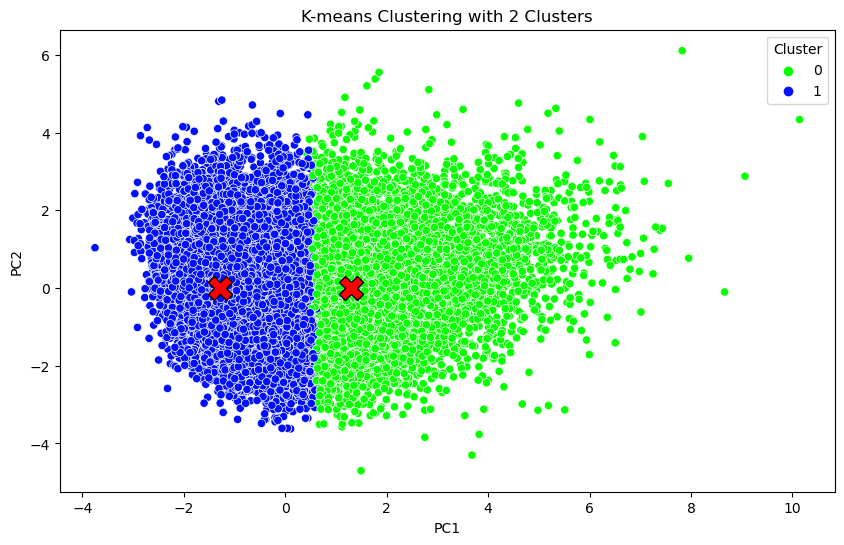

Cluster genres for k=2


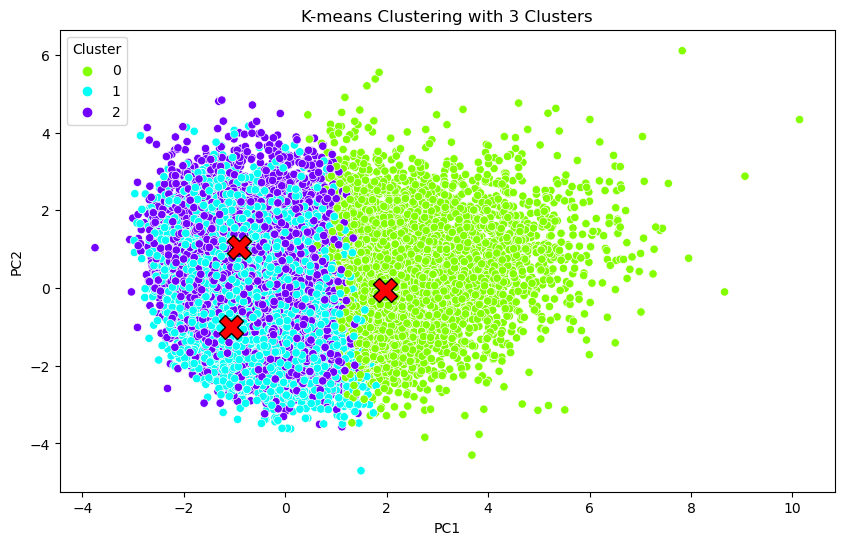

Cluster genres for k=3


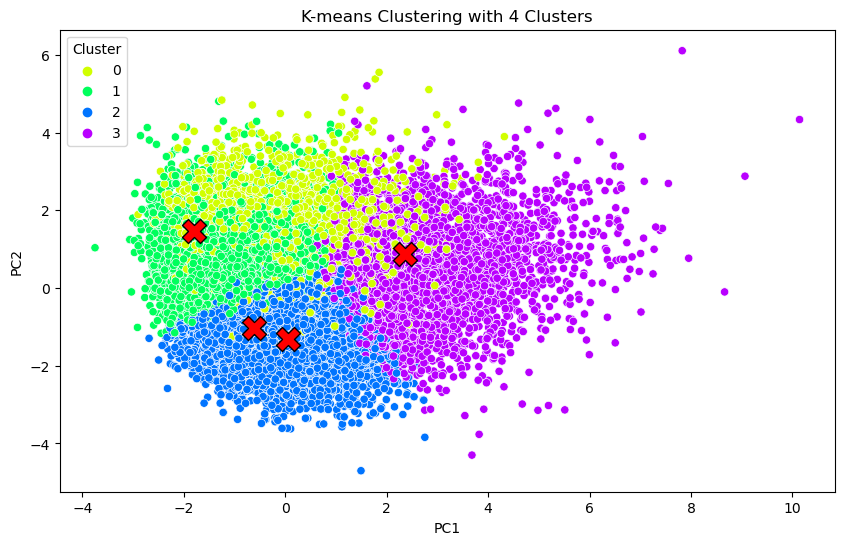

Cluster genres for k=4


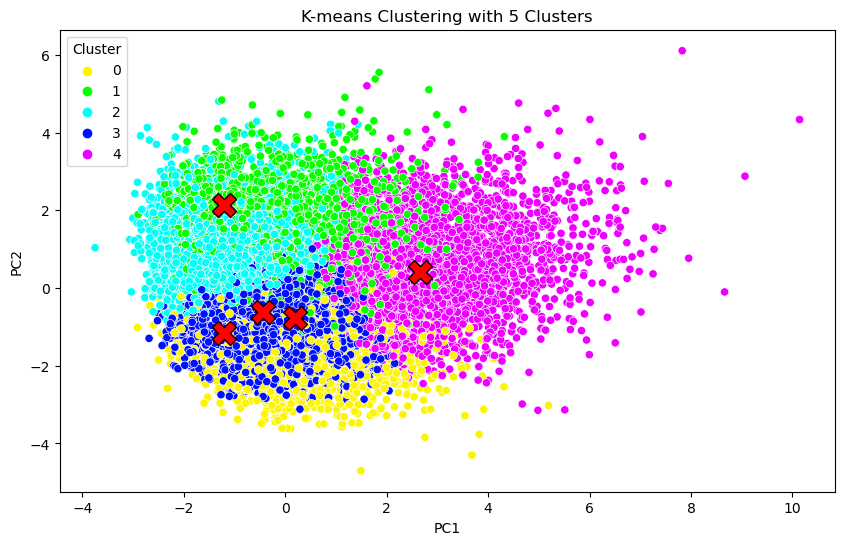

Cluster genres for k=5


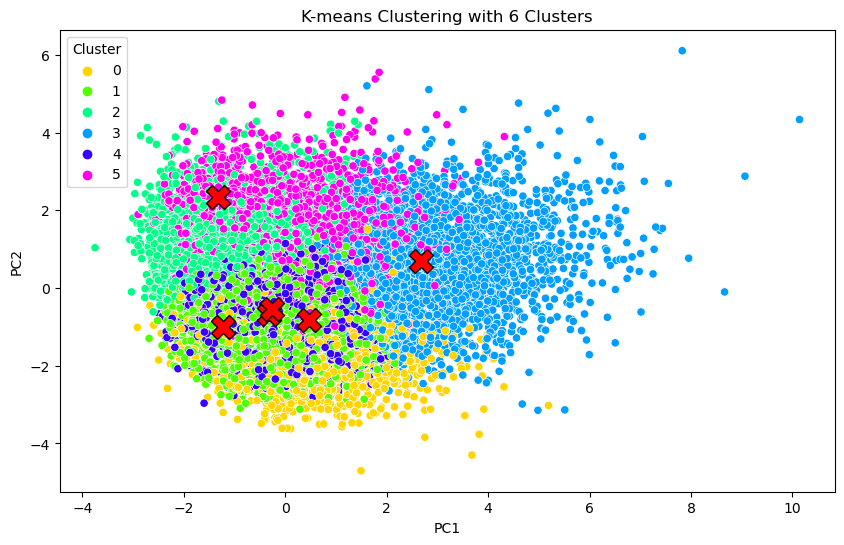

Cluster genres for k=6


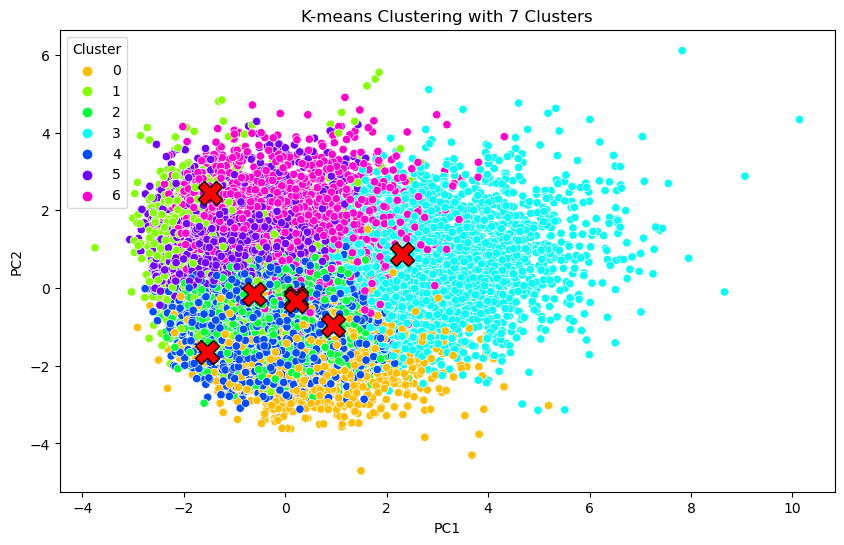

Cluster genres for k=7


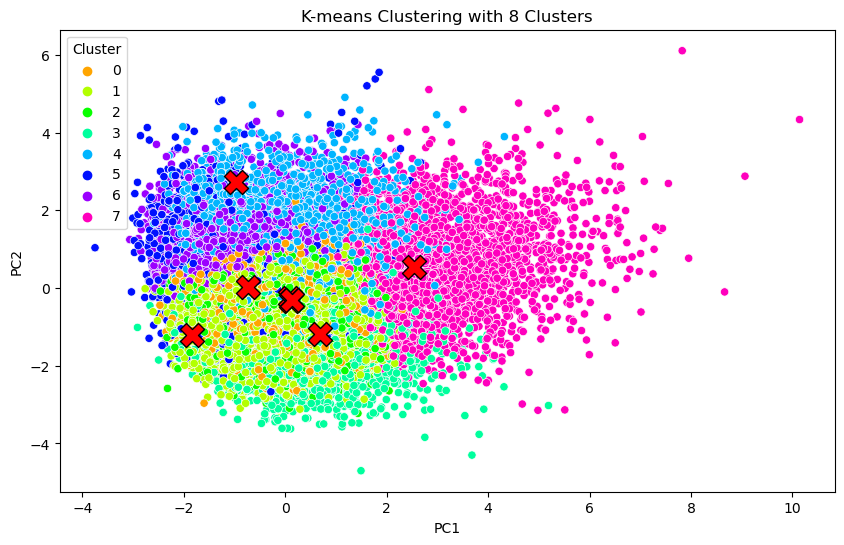

Cluster genres for k=8


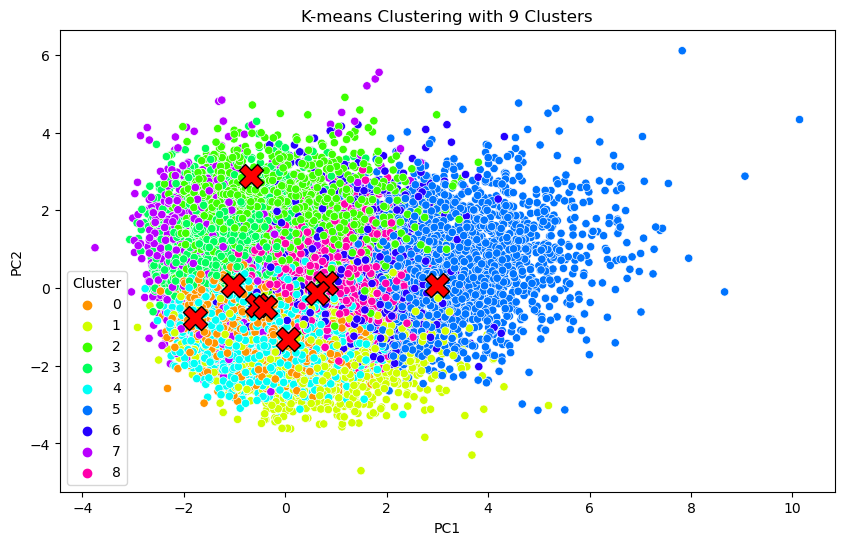

Cluster genres for k=9


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(data, clusters, centroids, k, pc1='PC1', pc2='PC2'):
    """Plot the clusters using the first two principal components."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[pc1], y=data[pc2], hue=clusters, palette=sns.color_palette('hsv', k), legend='full')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', edgecolor='black')
    plt.title(f'K-means Clustering with {k} Clusters')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.legend(title='Cluster')
    plt.show()

# Running K-means with clusters ranging from 2 to 9
for k in range(2, 10):
    clusters, centroids = kmeans(data_for_clustering, k)
    reduced_data_df['Cluster'] = clusters
    centroids_2d = PCA(n_components=2).fit_transform(centroids)
    plot_clusters(reduced_data_df, clusters, centroids_2d, k)

    # Print the genre of each cluster
    cluster_genres = final_data.groupby('Cluster')['track_name'].apply(lambda x: ', '.join(x.head(3)))
    print(f'Cluster genres for k={k}')


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

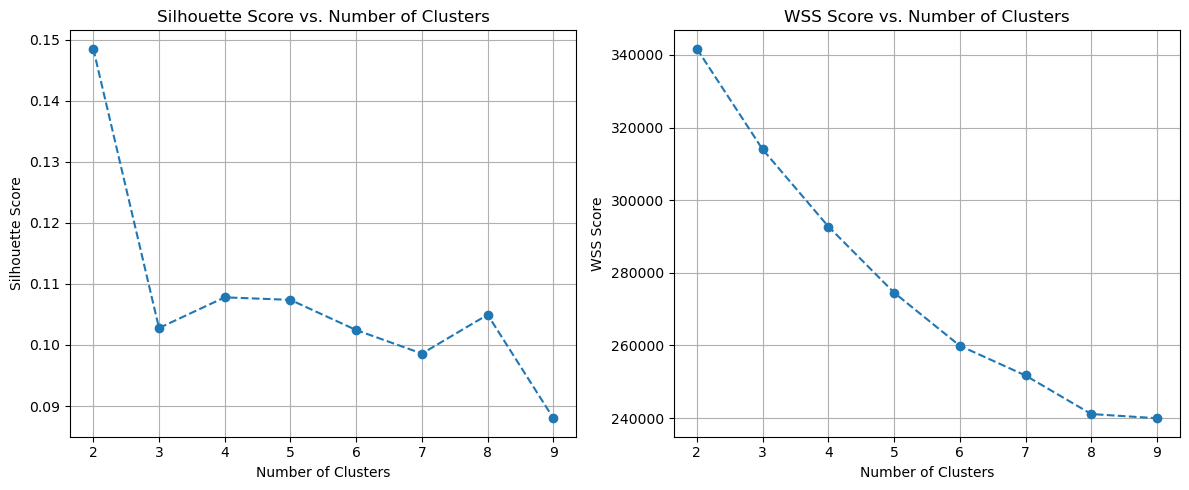

The optimal number of clusters based on the Silhouette score is: 1


In [16]:
from sklearn.metrics import silhouette_score

def calculate_wss(data, clusters, centroids):
    """Calculate the Within-Cluster Sum of Squares (WSS) score."""
    wss = 0
    for i in range(len(centroids)):
        cluster_data = data[clusters == i]
        wss += np.sum((cluster_data - centroids[i]) ** 2)
    return wss

# Initialize lists to store the scores
silhouette_scores = []
wss_scores = []

# Calculate the Silhouette score and WSS score for clusters ranging from 2 to 9
for k in range(2, 10):
    clusters, centroids = kmeans(data_for_clustering, k)
    
    # Silhouette score
    sil_score = silhouette_score(data_for_clustering, clusters)
    silhouette_scores.append(sil_score)
    
    # WSS score
    wss = calculate_wss(data_for_clustering, clusters, centroids)
    wss_scores.append(wss)

# Plot the Silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot the WSS scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='--')
plt.title('WSS Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.grid(True)

plt.tight_layout()
plt.show()




elbow point of WSS plot is at 8
and also, 8 is local maximum for other plot

so 8 is the optimal number of clusters

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [29]:
import random

# Initialize a dictionary to store random song pairs from each cluster
random_song_pairs = {}

# Define the number of random pairs to select per cluster
num_pairs_per_cluster = 2
# Iterate over each cluster
cnt = 0
for cluster_id in final_data['Cluster'].unique():
    # Select songs from the current cluster

    cluster_songs = final_data[final_data['Cluster'] == cluster_id]['track_name'].tolist()
    
    # Randomly select two songs from the cluster
    selected_pairs = random.sample(cluster_songs, num_pairs_per_cluster)
    
    # Store the selected pairs in the dictionary
    random_song_pairs[cluster_id] = selected_pairs

# Print the randomly selected song pairs from each cluster
for cluster_id, songs in random_song_pairs.items():
    print(f'Cluster {cluster_id} Songs:')
    for i, song in enumerate(songs, start=1):
        print(f'  Song {i}: {song}')
    print()


0     True
1    False
2     True
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: Cluster, dtype: bool
Cluster 0 Songs:
  Song 1: Sing Me to Sleep
  Song 2: Tired - Lemarroy Remix

Cluster 2 Songs:
  Song 1: Baila Baila Baila
  Song 2: Worth It

Cluster 3 Songs:
  Song 1: Godzilla
  Song 2: Red Nation

Cluster 1 Songs:
  Song 1: I'm On Fire
  Song 2: Noir

Cluster 4 Songs:
  Song 1: Up & Down
  Song 2: From Out of Nowhere



In [24]:
name_to_lookup = 'Power'
features_for_bob = spotify_data.loc[spotify_data['track_name'] == name_to_lookup]
print(features_for_bob)

      track_name  danceability  energy  key  loudness  mode  speechiness  \
8293       Power         0.441   0.854    4    -5.509     0       0.4860   
22480      Power         0.802   0.577    5    -4.483     1       0.0545   
26019      Power         0.616   0.677    9    -7.103     0       0.0364   
28756      Power         0.490   0.907    5    -4.063     0       0.1080   
29810      Power         0.490   0.907    5    -4.063     0       0.1080   
32297      Power         0.490   0.907    5    -4.063     0       0.1080   

       acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
8293       0.002740             0.000     0.175    0.597   81.309       334787  
22480      0.024100             0.000     0.165    0.544  130.652       218013  
26019      0.039400             0.553     0.230    0.821  100.001       291657  
28756      0.000427             0.000     0.116    0.210  132.057       148837  
29810      0.000427             0.000     0.116    0.210  132.

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

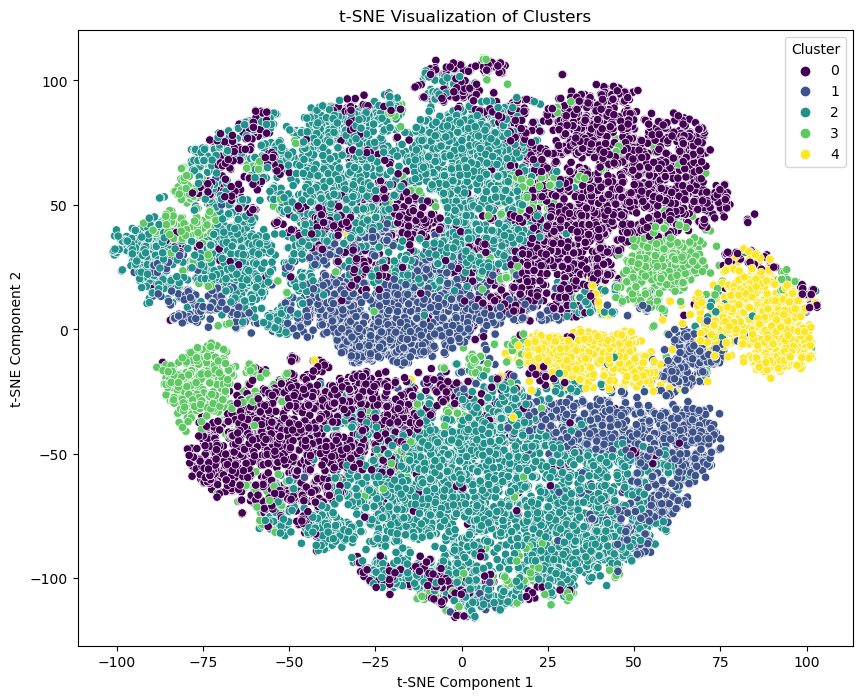

In [30]:
# TODO: Write your code here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data_for_clustering)  # Assuming data_for_clustering is already scaled or PCA-reduced

# Add the 2D representation back to final_data
final_data['tsne_1'] = data_2d[:, 0]
final_data['tsne_2'] = data_2d[:, 1]

# Plot the t-SNE visualization colored by clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Cluster', data=final_data, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()
